Finished parsing file C:\Users\zj2626\GraphLabData\Data.csv

Parsing completed. Parsed 59 lines in 0.020542 secs.

Finished parsing file C:\Users\zj2626\GraphLabData\Data.csv

Parsing completed. Parsed 59 lines in 0.023015 secs.

Linear regression:

--------------------------------------------------------

Number of examples          : 51

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 7950.318892        | 2448.149015   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 51

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.001000     | 4317.987435        | 1644.615715   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

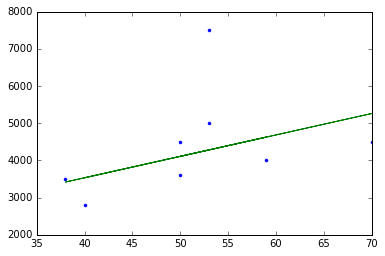

In [39]:
# -*- coding: utf-8 -*-
# version python2.7 
#  构建回归模型-预测房租价格  
import sys
reload(sys)  
sys.setdefaultencoding('utf8')
import graphlab

sales = graphlab.SFrame('GraphLabData/Data.csv')

# 设置视图显示到ipynb中而不是显示到新页面
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x = "size", y = "price")

# 分离出训练集和测试集 random_split(参数一：训练集划分比例, 参数二：seed，使得多次划分结果相同而不是由于随机划分而不同)
train_data, test_data = sales.random_split(.8, seed = 0)

# 构建回归模型 通过训练集的房屋面积和房租构建针对于面积和房租关系的回归模型
mj_model = graphlab.linear_regression.create(train_data, target = 'price', features = {'size'})

# Number of examples 训练集个数
# Number of features 特征个数
# Number of coefficients 两个参数

# 评估回归模型

# print (test_data['price'].mean()) #测试集合均值
print (mj_model.evaluate(test_data)) # 使用evaluate函数评估模型（参数为测试集数据）max_error:最大误差，rmse:平均误差

# 画图展示回归模型以及其和原始数据的关系
import matplotlib.pyplot as plt
# 把画出的图重定向到本页面
%matplotlib inline 

# print (test_data['price'])
# 画图：属性1:第一个图x轴 属性2:第一个图y轴 属性3:第一个图点的形式  属性1:第二个图x轴 第二个图属性2:y轴 第二个图属性3:点的形式
plt.plot(test_data['size'], test_data['price'], '.', test_data['size'], mj_model.predict(test_data), '-')

# 获取回归模型的截距和斜率 (可能打印在控制台)
print (mj_model.get('coefficients'))

# 添加其他特征
my_features = {'type','size','front','floor','state'}
sales[my_features].show()

# 查看单个特征关于房租的分组信息（特征：type）
sales.show(view = 'BoxWhisker Plot', x = 'type', y = 'price')

# 使用多个特征构建回归模型
my_features_model  = graphlab.linear_regression.create(train_data, target = 'price', features = my_features)
print (my_features_model.evaluate(test_data))

# 使用回归模型预测房租
house1 = sales[sales['size'] == 188] # 查看size为188的数据的信息
print (house1['price'])  # 数据中实际房租   like:20000L
print (mj_model.predict(house1)) #使用单特征模型预测的房租 like:12049L
print (my_features_model.predict(house1)) #使用多特征模型预测的房租 like:19998L